In [7]:
from google.colab import files

uploaded = files.upload()

Saving country_wise_latest.csv to country_wise_latest (1).csv
Saving covid_19_clean_complete.csv to covid_19_clean_complete (1).csv
Saving day_wise.csv to day_wise (1).csv
Saving full_grouped.csv to full_grouped (1).csv
Saving usa_county_wise.csv to usa_county_wise (1).csv
Saving worldometer_data.csv to worldometer_data (1).csv


In [40]:
!pip install matplotlib
import pandas as pd
import io
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv(io.BytesIO(uploaded['country_wise_latest (1).csv']))
print("Country Wise Latest\n\n", df)
df = pd.read_csv(io.BytesIO(uploaded['covid_19_clean_complete (1).csv']))
print("\n\nCOVID-19 Clean Complete\n\n", df)
df = pd.read_csv(io.BytesIO(uploaded['day_wise (1).csv']))
print("\n\nDay Wise\n\n", df)
df = pd.read_csv(io.BytesIO(uploaded['full_grouped (1).csv']))
print("\n\nFull Grouped\n\n", df)
df = pd.read_csv(io.BytesIO(uploaded['usa_county_wise (1).csv']))
print("\n\nUSA County Wise\n\n", df)
df = pd.read_csv(io.BytesIO(uploaded['worldometer_data (1).csv']))
print("\n\nWoldometer Data\n\n", df)

Country Wise Latest

          Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    1991        117   
2               Algeria      27973    1163      18837    7973        616   
3               Andorra        907      52        803      52         10   
4                Angola        950      41        242     667         18   
..                  ...        ...     ...        ...     ...        ...   
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 1

In [32]:
country_wise_latest = pd.read_csv('country_wise_latest.csv')
covid_19_clean_complete = pd.read_csv('covid_19_clean_complete.csv')
day_wise = pd.read_csv('day_wise.csv')
full_grouped = pd.read_csv('full_grouped.csv')
worldometer_data = pd.read_csv('worldometer_data.csv')

country_wise_latest_info = country_wise_latest.info()
covid_19_clean_complete_info = covid_19_clean_complete.info()
day_wise_info = day_wise.info()
full_grouped_info = full_grouped.info()
worldometer_data_info = worldometer_data.info()

(country_wise_latest_info, covid_19_clean_complete_info, day_wise_info, full_grouped_info, worldometer_data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

(None, None, None, None, None)

## Basic Information About the Datasets

country_wise_latest.csv:

*   Has 187 records with 15 columns. Includes information like country/region, confirmed, deaths, active, new cases, and percentage metrics like deaths/100 cases.

covid_19_clean_complete.csv:

 *  Has 49,068 records with 10 columns, like Province/State, Country/region, Latitude, Longitude, Date, Confirmed Cases, Deaths, and people recovered

day_wise.csv:

 *  Has 188 records with 12 columns.\

full_grouped.csv:

 *  Has 35,156 records with 10 columns. Similar to the covid_19_clean_complete dataset, but this dataset is organized by date and country

worlometer_data.csv:

 *  Has 209 records and 16 columns.

In [33]:
covid_19_clean_complete['Date'] = pd.to_datetime(covid_19_clean_complete['Date'])
full_grouped['Date'] = pd.to_datetime(full_grouped['Date'])
day_wise['Date'] = pd.to_datetime(day_wise['Date'])

merged_data = pd.merge(full_grouped, worldometer_data, on='Country/Region', how='left')

missing_values = merged_data.isnull().sum()

merged_data_info = merged_data.info()
(merged_data_info, missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              35156 non-null  datetime64[ns]
 1   Country/Region    35156 non-null  object        
 2   Confirmed         35156 non-null  int64         
 3   Deaths            35156 non-null  int64         
 4   Recovered         35156 non-null  int64         
 5   Active            35156 non-null  int64         
 6   New cases         35156 non-null  int64         
 7   New deaths        35156 non-null  int64         
 8   New recovered     35156 non-null  int64         
 9   WHO Region_x      35156 non-null  object        
 10  Continent         32148 non-null  object        
 11  Population        32148 non-null  float64       
 12  TotalCases        32148 non-null  float64       
 13  NewCases          564 non-null    float64       
 14  TotalDeaths       2989

(None,
 Date                    0
 Country/Region          0
 Confirmed               0
 Deaths                  0
 Recovered               0
 Active                  0
 New cases               0
 New deaths              0
 New recovered           0
 WHO Region_x            0
 Continent            3008
 Population           3008
 TotalCases           3008
 NewCases            34592
 TotalDeaths          5264
 NewDeaths           34780
 TotalRecovered       3572
 NewRecovered        34780
 ActiveCases          3572
 Serious,Critical    14852
 Tot Cases/1M pop     3008
 Deaths/1M pop        5264
 TotalTests           5640
 Tests/1M pop         5640
 WHO Region_y         3008
 dtype: int64)

In [34]:
#Handles missing data

merged_data['Continent'].fillna(merged_data['Continent'].mode()[0], inplace=True)
merged_data['Population'].fillna(merged_data['Population'].median(), inplace=True)

merged_data['TotalCases'].fillna(method='ffill', inplace=True)
merged_data['TotalDeaths'].fillna(method='ffill', inplace=True)
merged_data['ActiveCases'].fillna(method='ffill', inplace=True)

merged_data['NewCases'].fillna(0, inplace=True)
merged_data['NewDeaths'].fillna(0, inplace=True)
merged_data['NewRecovered'].fillna(0, inplace=True)

merged_data['Serious,Critical'].fillna(merged_data['Serious,Critical'].median(), inplace=True)
merged_data['Tests/1M pop'].fillna(merged_data['Tests/1M pop'].median(), inplace=True)

#Checks for missing values

remaining_missing_values = merged_data.isnull().sum()

remaining_missing_values

<ipython-input-34-3b9428e8c3a3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Continent'].fillna(merged_data['Continent'].mode()[0], inplace=True)
<ipython-input-34-3b9428e8c3a3>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

,0
Date,0
Country/Region,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
WHO Region_x,0


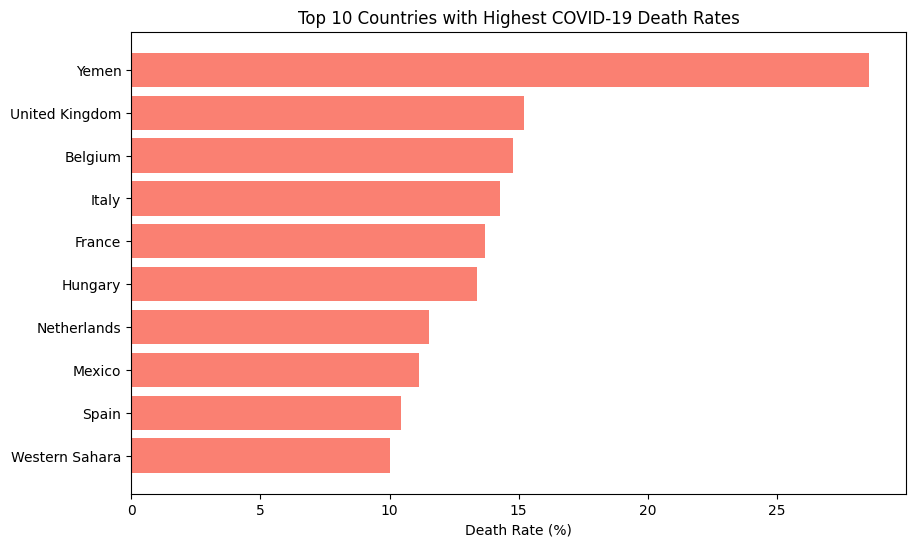

In [41]:
#Calculates death rates
country_wise_latest['Death Rate (%)'] = (country_wise_latest['Deaths'] / country_wise_latest['Confirmed']) * 100

#Shows the top ten countries with the highest death rates
top_10_death_rates = country_wise_latest[['Country/Region', 'Death Rate (%)']].sort_values(by='Death Rate (%)', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_10_death_rates['Country/Region'], top_10_death_rates['Death Rate (%)'], color='salmon')
plt.xlabel('Death Rate (%)')
plt.title('Top 10 Countries with Highest COVID-19 Death Rates')
plt.gca().invert_yaxis()
plt.show()

<ipython-input-42-6b4be5c052ed>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['Continent'].fillna(merged_data['Continent'].mode()[0], inplace=True)
<ipython-input-42-6b4be5c052ed>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

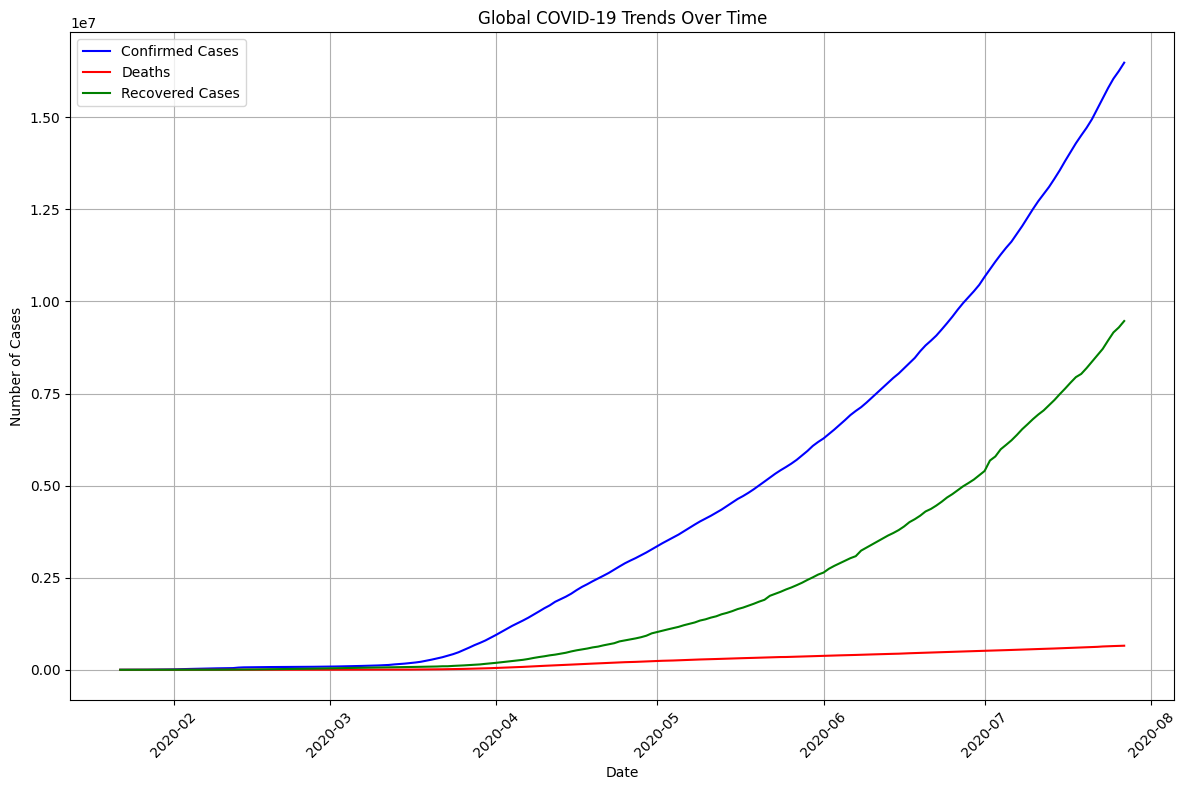

In [42]:
# Convert date columns to datetime format for easier manipulation
covid_19_clean_complete['Date'] = pd.to_datetime(covid_19_clean_complete['Date'])
full_grouped['Date'] = pd.to_datetime(full_grouped['Date'])
day_wise['Date'] = pd.to_datetime(day_wise['Date'])

# Merge datasets on 'Country/Region' to include demographic and health-related data from worldometer_data
merged_data = pd.merge(full_grouped, worldometer_data, on='Country/Region', how='left')

# Fill missing 'Continent' and 'Population' with mode for simplicity
merged_data['Continent'].fillna(merged_data['Continent'].mode()[0], inplace=True)
merged_data['Population'].fillna(merged_data['Population'].median(), inplace=True)

# Forward fill missing values in cumulative columns
merged_data['TotalCases'].fillna(method='ffill', inplace=True)
merged_data['TotalDeaths'].fillna(method='ffill', inplace=True)
merged_data['ActiveCases'].fillna(method='ffill', inplace=True)

# Replace missing values in new cases and deaths with 0
merged_data['NewCases'].fillna(0, inplace=True)
merged_data['NewDeaths'].fillna(0, inplace=True)
merged_data['NewRecovered'].fillna(0, inplace=True)

# Group the data by date to visualize global trends
global_trends = merged_data.groupby('Date').sum()

# Plotting the trends for confirmed cases, deaths, and recovered cases
plt.figure(figsize=(12, 8))

# Plot Confirmed cases
plt.plot(global_trends.index, global_trends['Confirmed'], label='Confirmed Cases', color='blue')

# Plot Deaths
plt.plot(global_trends.index, global_trends['Deaths'], label='Deaths', color='red')

# Plot Recovered cases
plt.plot(global_trends.index, global_trends['Recovered'], label='Recovered Cases', color='green')

plt.title('Global COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()

# Show the plot
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

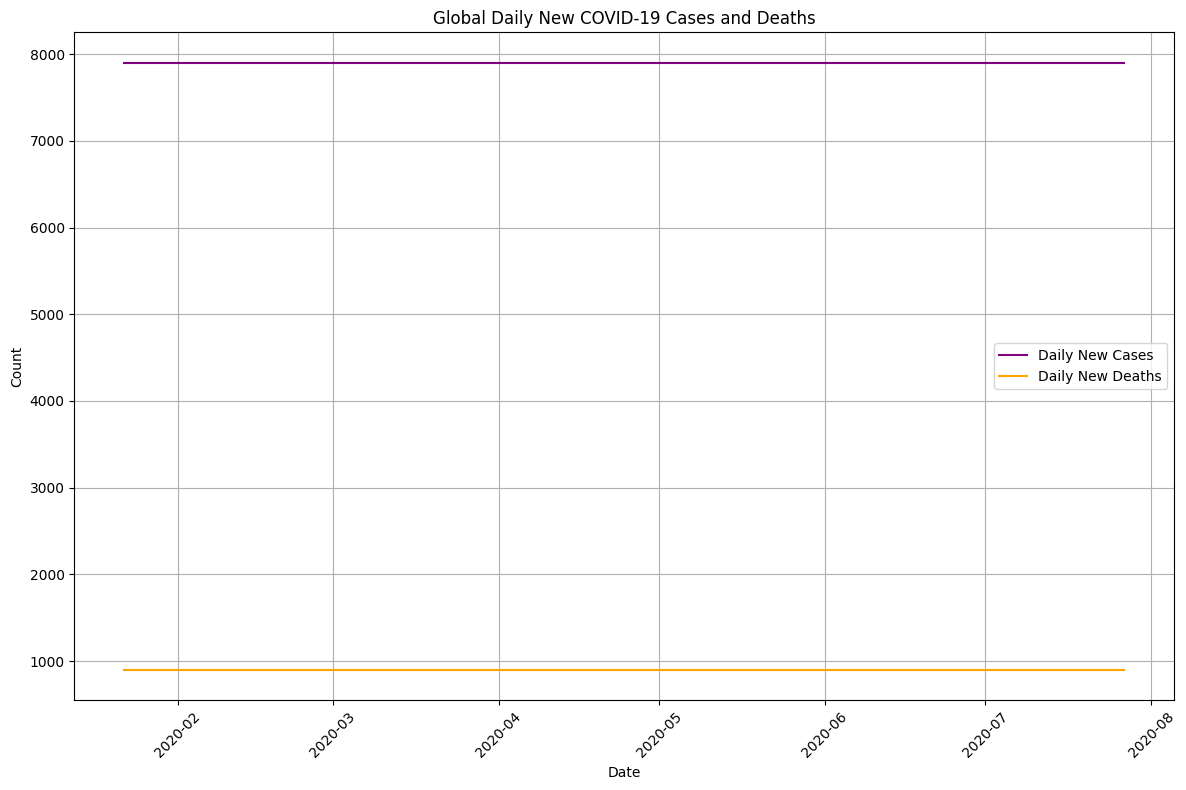

In [44]:
# Daily new cases and deaths over time
plt.figure(figsize=(12, 8))
plt.plot(global_trends.index, global_trends['NewCases'], label='Daily New Cases', color='purple')
plt.plot(global_trends.index, global_trends['NewDeaths'], label='Daily New Deaths', color='orange')
plt.title('Global Daily New COVID-19 Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

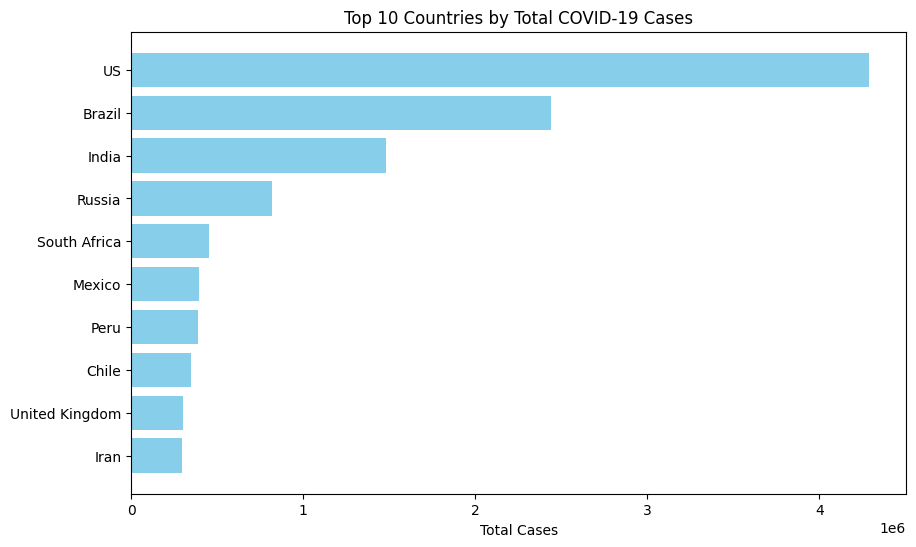

In [46]:
# Top ten countries by total cases
top_10_countries = country_wise_latest[['Country/Region', 'Confirmed']].sort_values(by='Confirmed', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_countries['Country/Region'], top_10_countries['Confirmed'], color='skyblue')
plt.xlabel('Total Cases')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.gca().invert_yaxis()
plt.show()

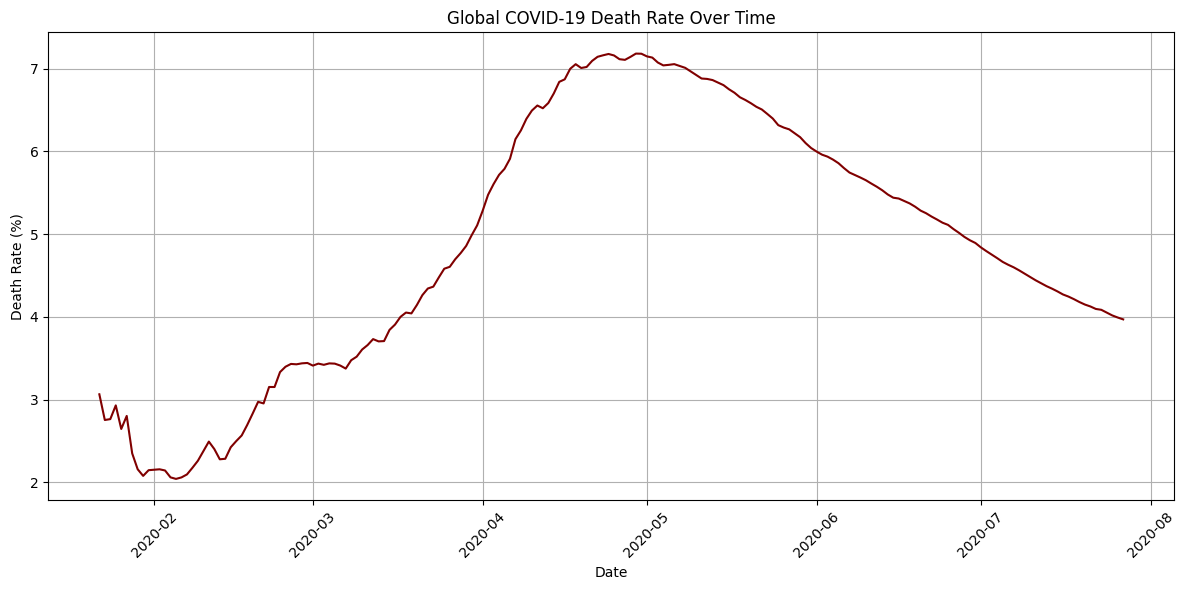

In [48]:
# Global death rate over time
global_trends['Death Rate (%)'] = (global_trends['Deaths'] / global_trends['Confirmed']) * 100
plt.figure(figsize=(12, 6))
plt.plot(global_trends.index, global_trends['Death Rate (%)'], label='Death Rate (%)', color='maroon')
plt.title('Global COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

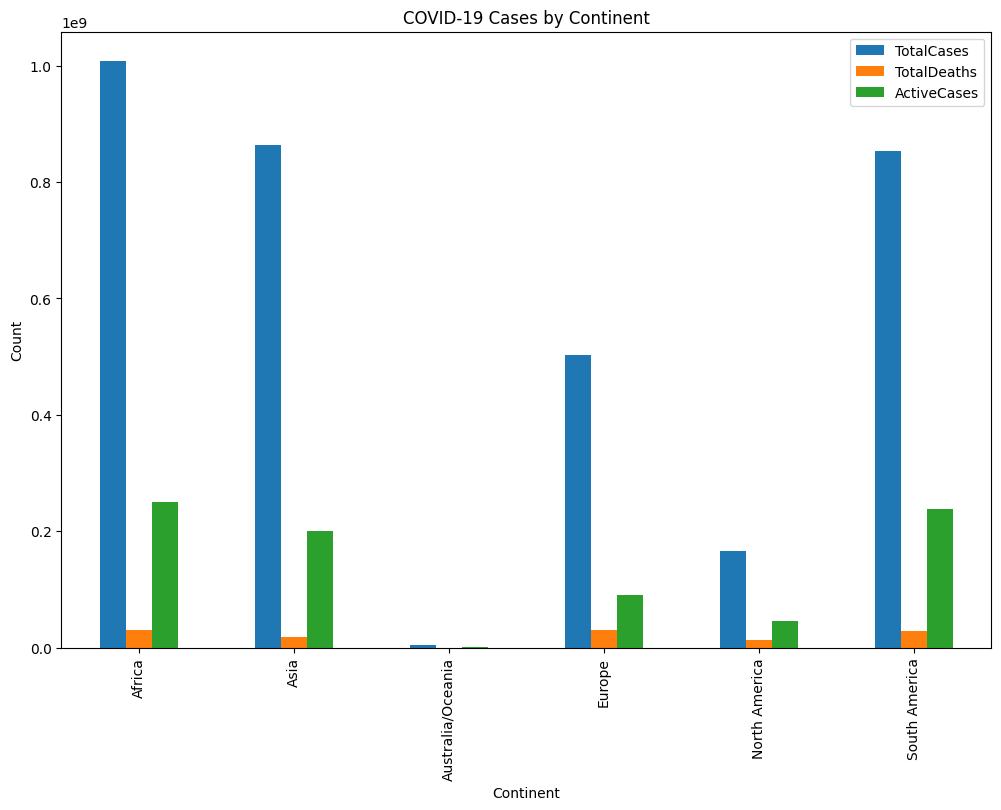

In [50]:
# Cases in each continent
continent_data = merged_data.groupby('Continent')[['TotalCases', 'TotalDeaths', 'ActiveCases']].sum()
continent_data.plot(kind='bar', figsize=(12, 8))
plt.title('COVID-19 Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Count')

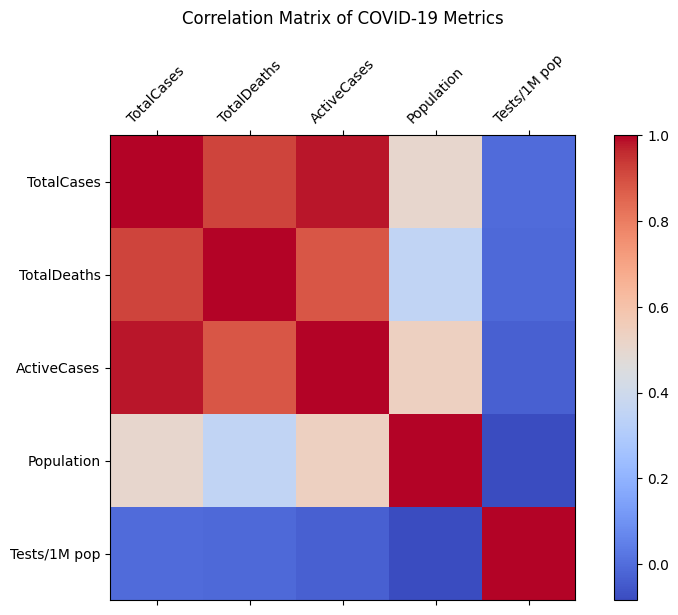

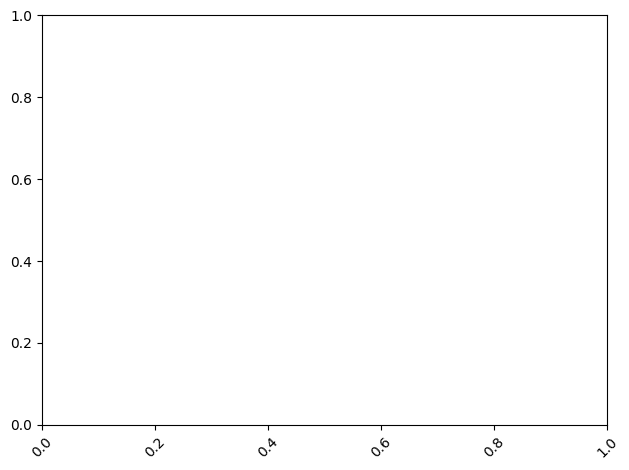

In [51]:
# Correlation Analysis
correlation_matrix = merged_data[['TotalCases', 'TotalDeaths', 'ActiveCases', 'Population', 'Tests/1M pop']].corr()
plt.figure(figsize=(10, 6))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix of COVID-19 Metrics', pad=20)
plt.show()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()